<a href="https://colab.research.google.com/github/waqasali143/Road_Traffic_Accident/blob/main/Road_Traffic_Classification_Version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sweetviz

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# import sweetviz as sv

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/miss_aq/project3/RTA Dataset.csv')

In [ ]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
print(data.shape)
data.info()

(12316, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment    

In [ ]:
data.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [ ]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
data.Accident_severity.unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [ ]:
data.nunique()

Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [ ]:
data.Day_of_week.value_counts()

Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: Day_of_week, dtype: int64

# We can use different technique for Bar Plot

In [ ]:
import plotly.graph_objects as go

# Unique values for 'Accident_severity'
day_counts = {
    'Friday': 2041,
    'Thursday': 1851,
    'Wednesday': 1840,
    'Tuesday': 1770,
    'Monday': 1681,
    'Saturday': 1666,
    'Sunday': 1467
}

# Create a Plotly bar plot
fig = go.Figure()
fig.add_trace(go.Bar(
    x=list(day_counts.keys()),
    y=list(day_counts.values()),
    # marker=dict(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#cc7f0e', '#facf0b', '#aa7b7e', '#2c602c']),
    width=0.4,
))

# Customize layout
fig.update_layout(
    title='Bar Plot of  Accident Days',
    xaxis=dict(title='Accident'),
    yaxis=dict(title='days_counts'),
)

fig.show()

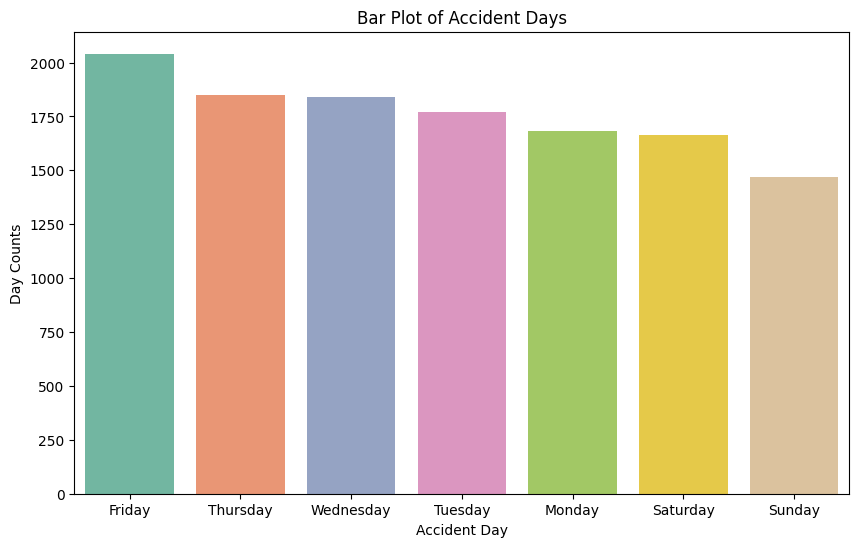

In [ ]:
# Unique values for 'Accident_severity'
day_counts = {
    'Friday': 2041,
    'Thursday': 1851,
    'Wednesday': 1840,
    'Tuesday': 1770,
    'Monday': 1681,
    'Saturday': 1666,
    'Sunday': 1467
}

# Convert dictionary to DataFrame
df = pd.DataFrame(list(day_counts.items()), columns=['Day', 'Count'])

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='Count', data=df, palette='Set2')
plt.title('Bar Plot of Accident Days')
plt.xlabel('Accident Day')
plt.ylabel('Day Counts')

plt.show()


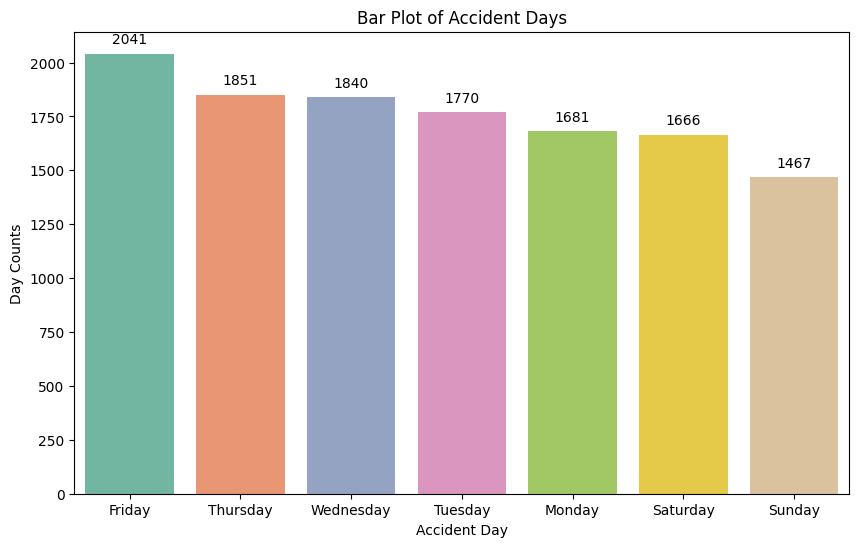

In [ ]:
# Unique values for 'Accident_severity'
day_counts = {
    'Friday': 2041,
    'Thursday': 1851,
    'Wednesday': 1840,
    'Tuesday': 1770,
    'Monday': 1681,
    'Saturday': 1666,
    'Sunday': 1467
}

# Convert dictionary to DataFrame
df = pd.DataFrame(list(day_counts.items()), columns=['Day', 'Count'])

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Day', y='Count', data=df, palette='Set2')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Bar Plot of Accident Days')
plt.xlabel('Accident Day')
plt.ylabel('Day Counts')
plt.show()


In [ ]:
data.Accident_severity.value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

In [ ]:
# Unique values for 'Accident_severity'
data = {'Slight Injury': 10415, 'Serious Injury': 1743, 'Fatal injury': 158}

# Create a Plotly bar plot
fig = go.Figure()
fig.add_trace(go.Bar(
    x=list(data.keys()),
    y=list(data.values()),
    marker=dict(color=['#1f77b4', '#ff7f0e', '#2ca02c']),
    width=0.4,
))

# Customize layout
fig.update_layout(
    title='Bar Plot of Accident Severity',
    xaxis=dict(title='Accident Severity'),
    yaxis=dict(title='Counts'),
)

fig.show()

In [ ]:
data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
# RT_report = sv.analyze(data)
# RT_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



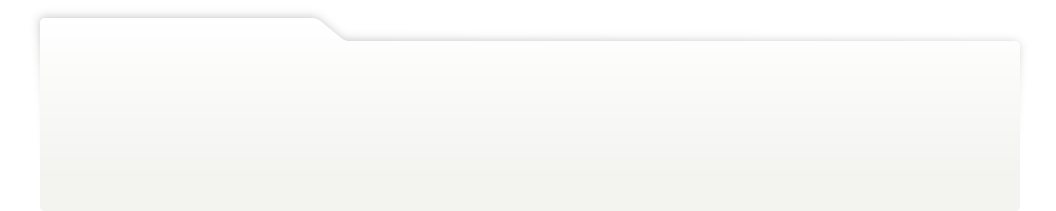
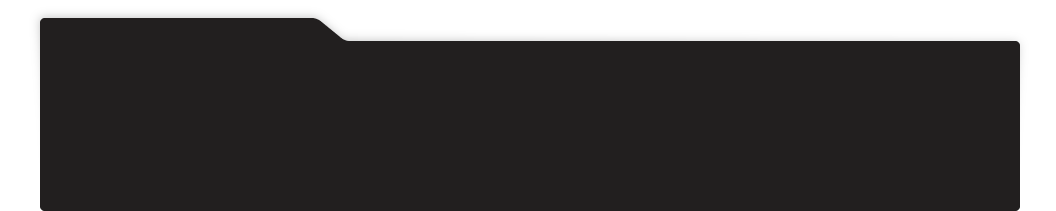
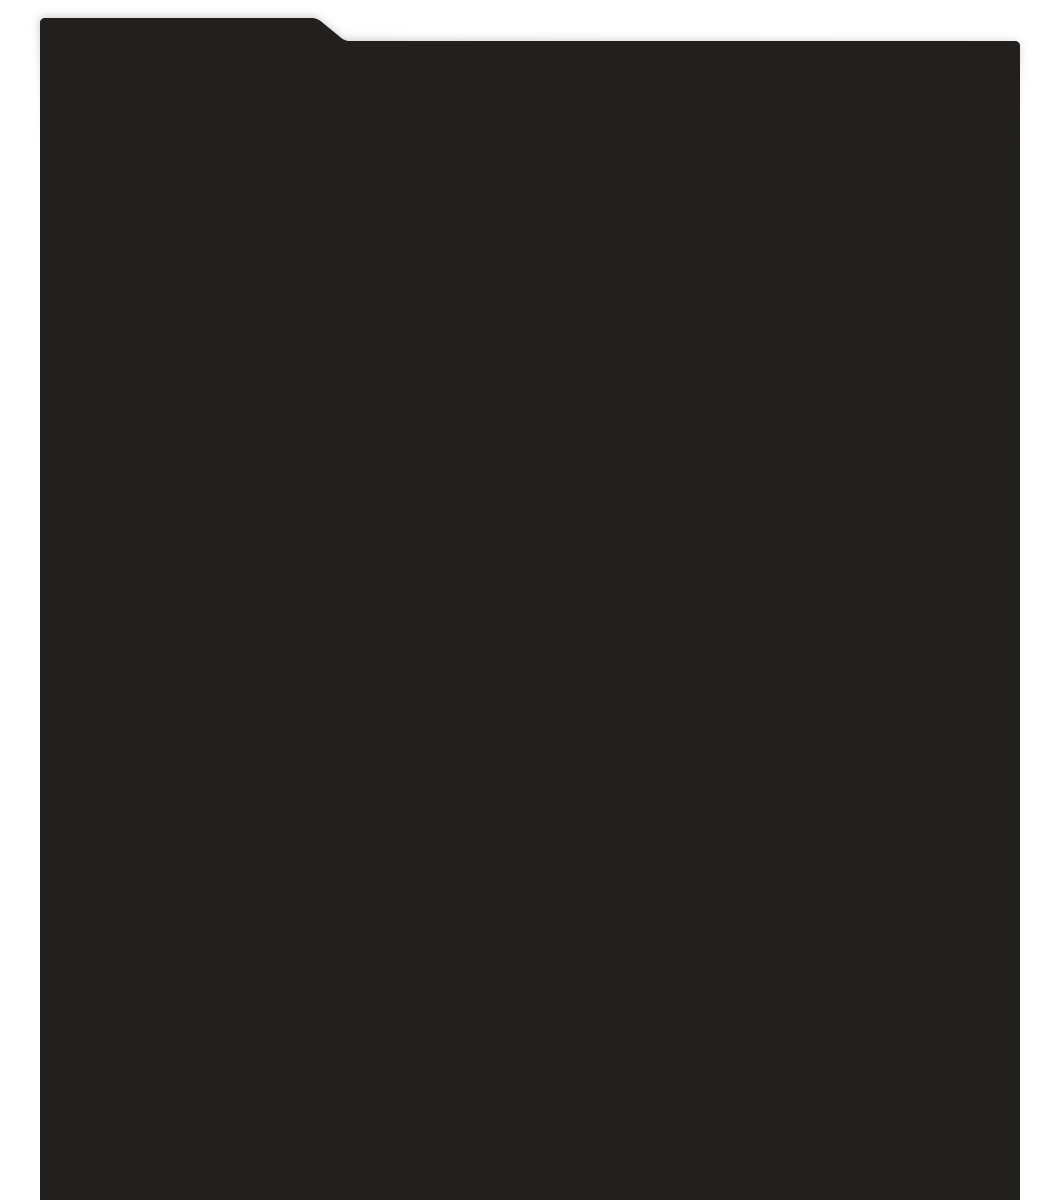
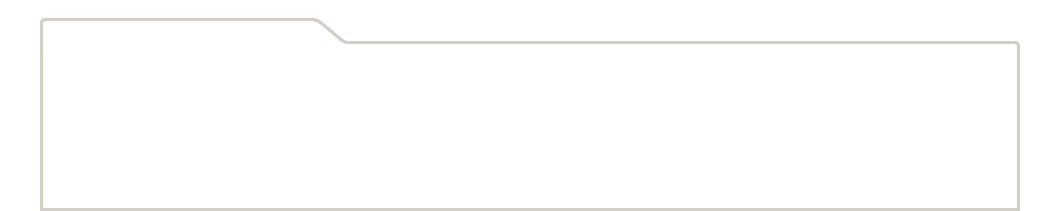
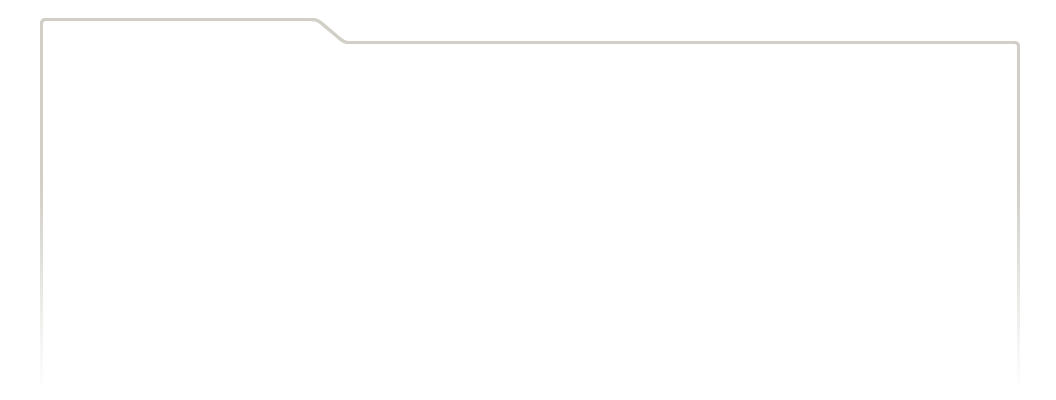
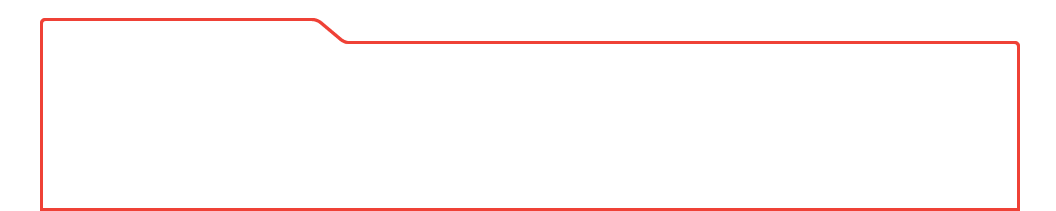
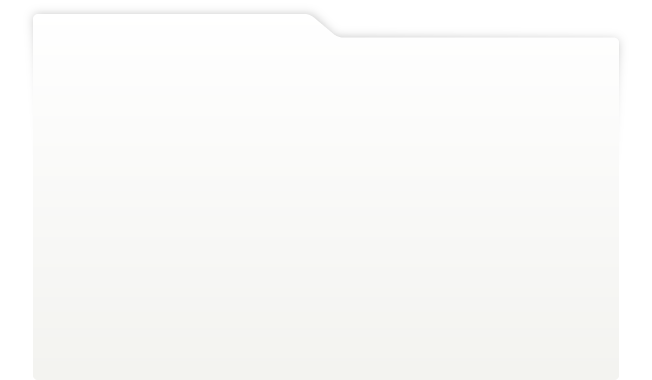
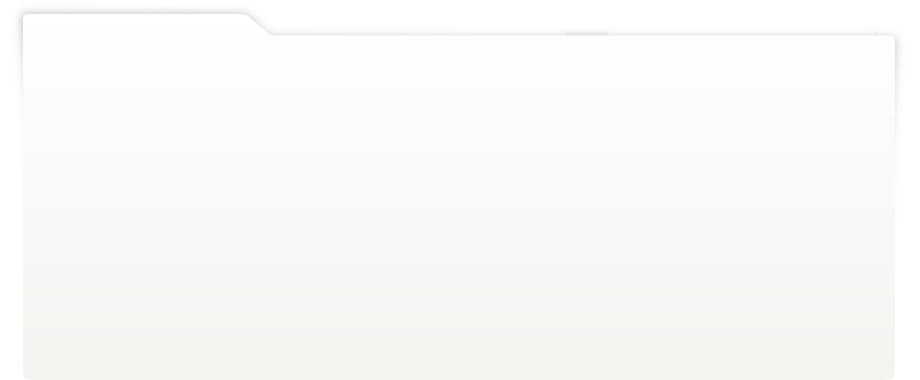
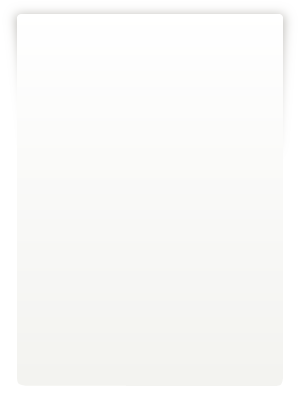
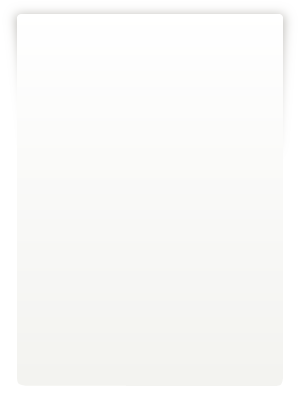
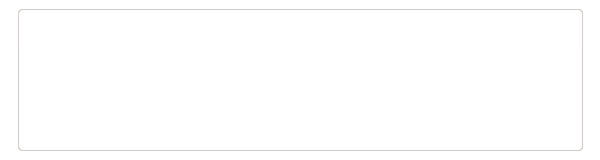
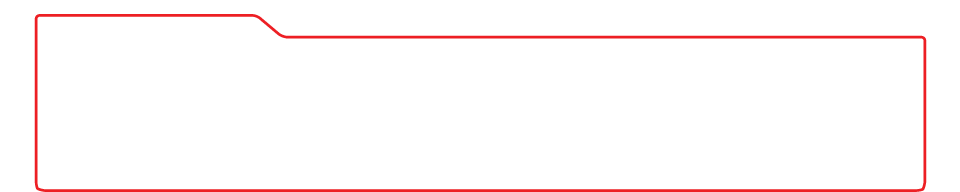
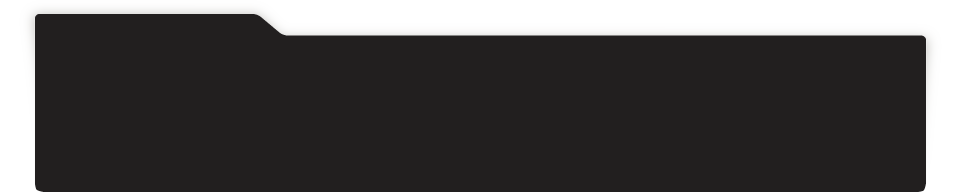
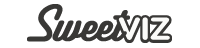
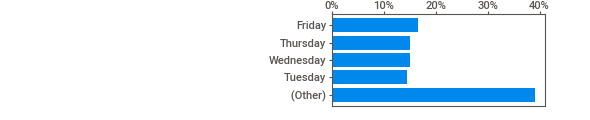
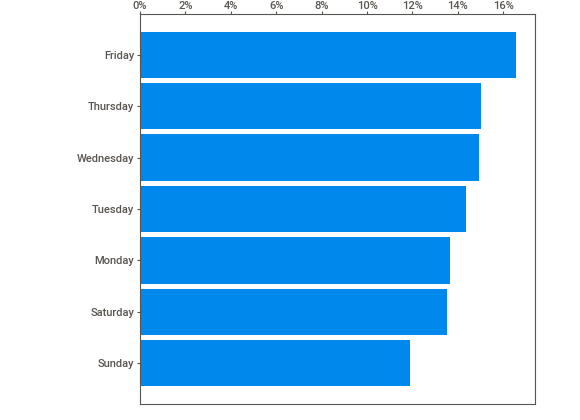
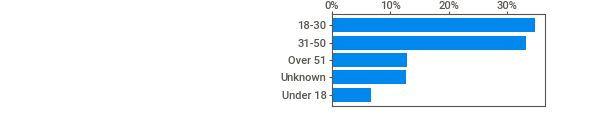
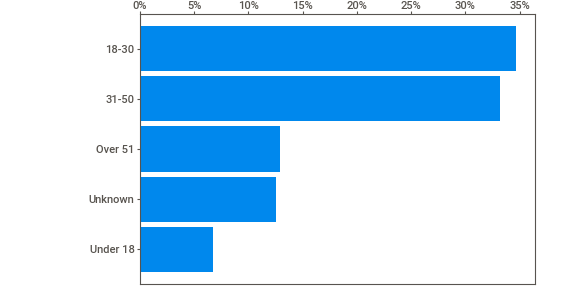
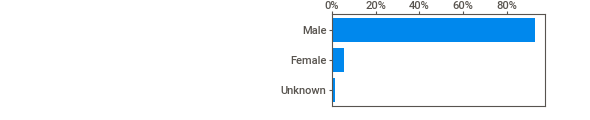
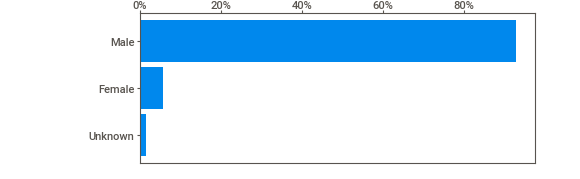
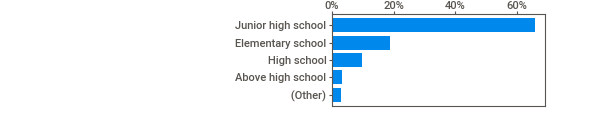
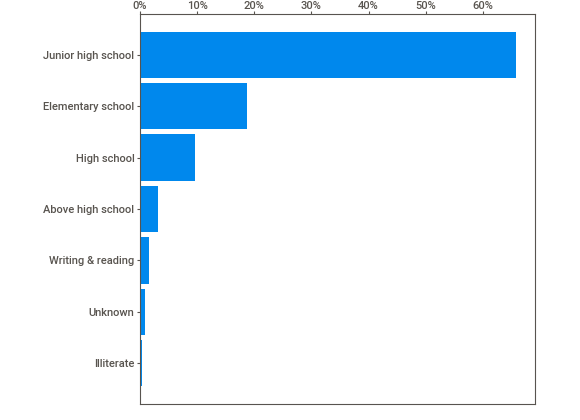
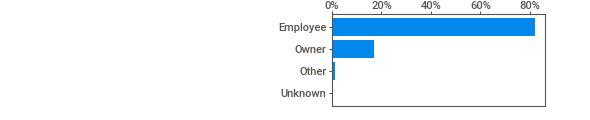
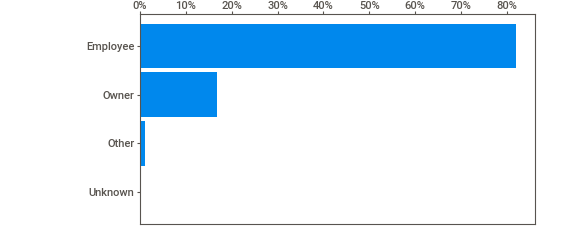
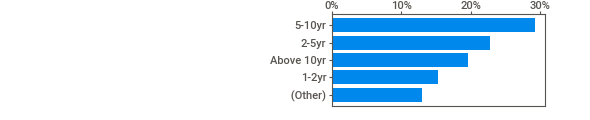
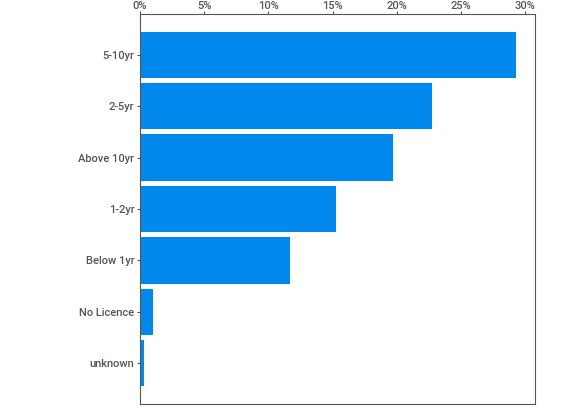
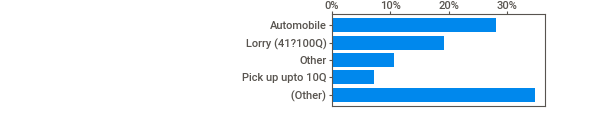
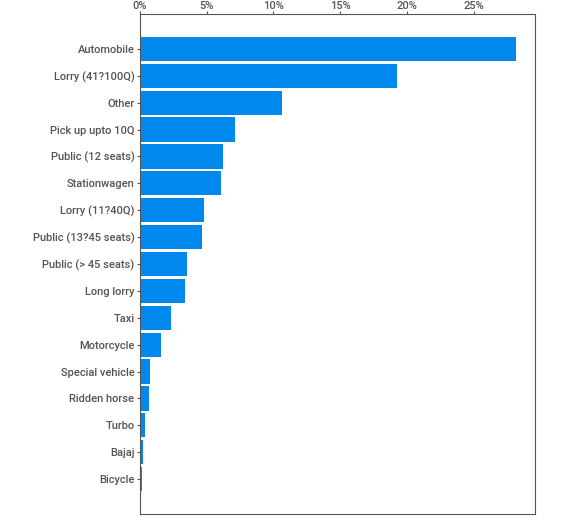
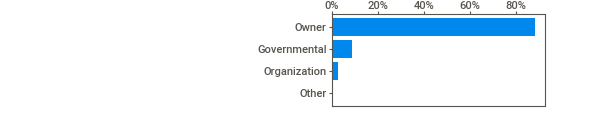
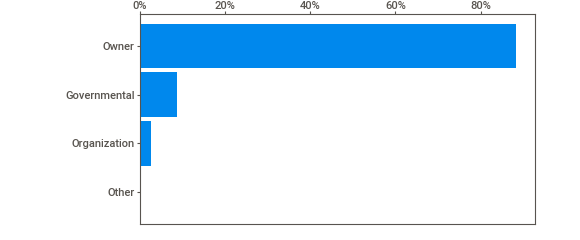
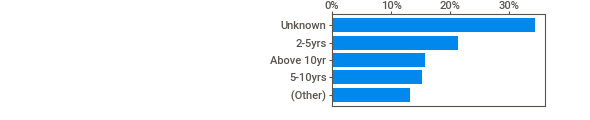
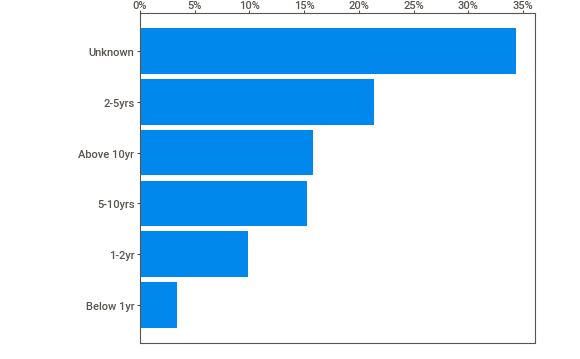
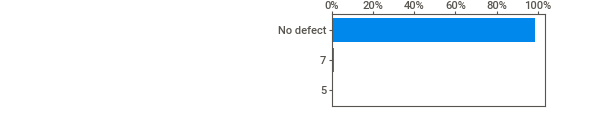
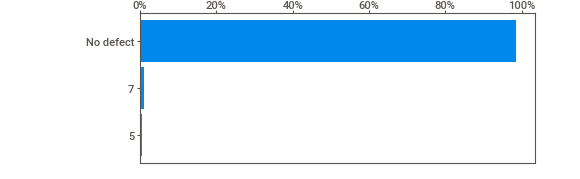
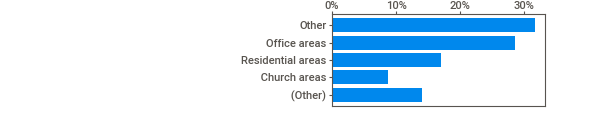
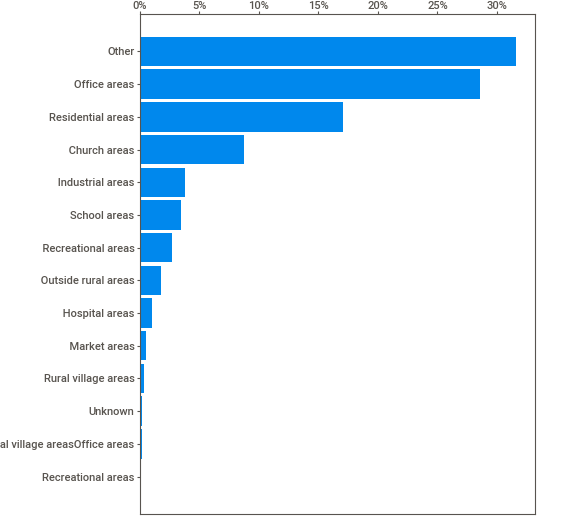
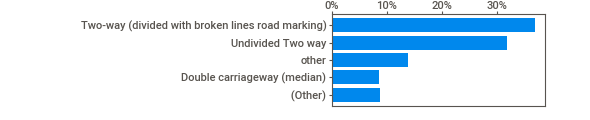
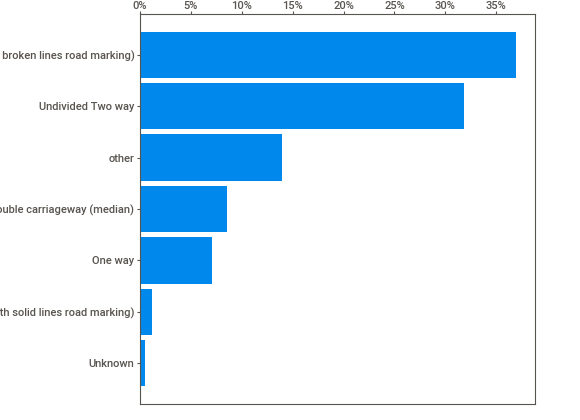
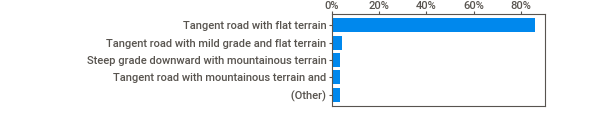
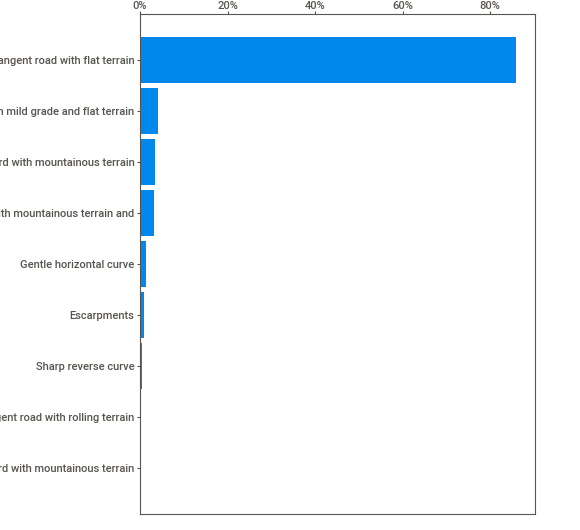
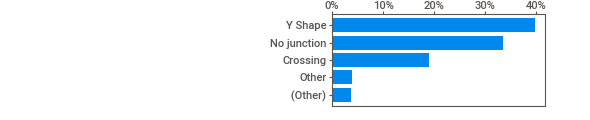
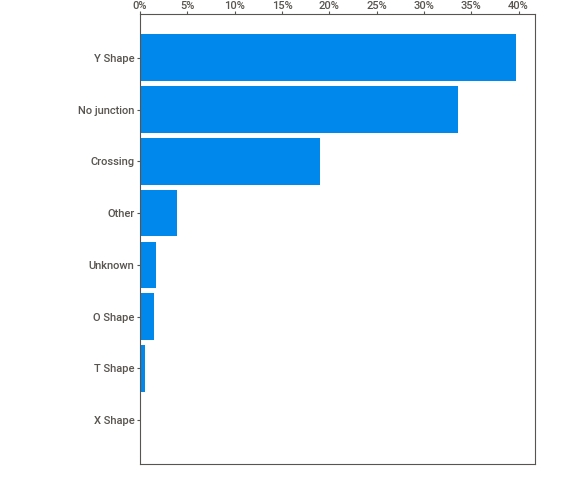
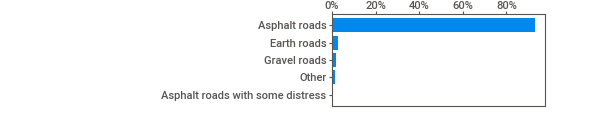
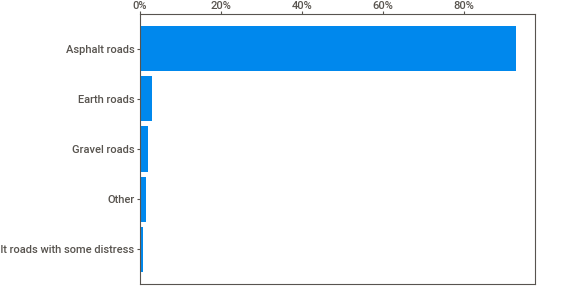
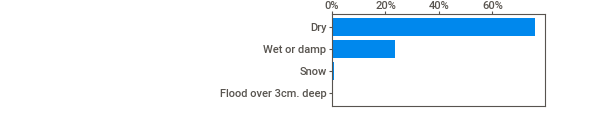
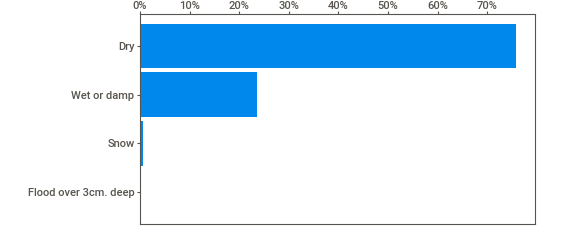
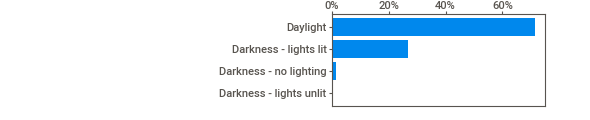
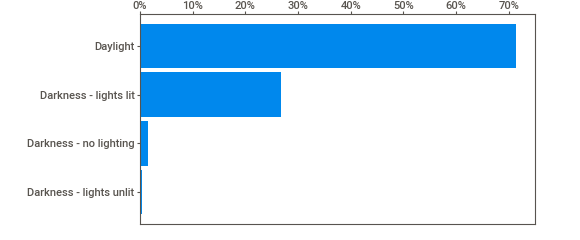
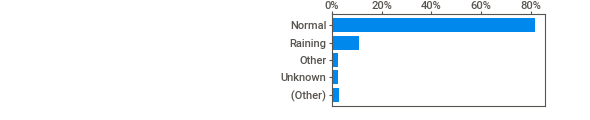
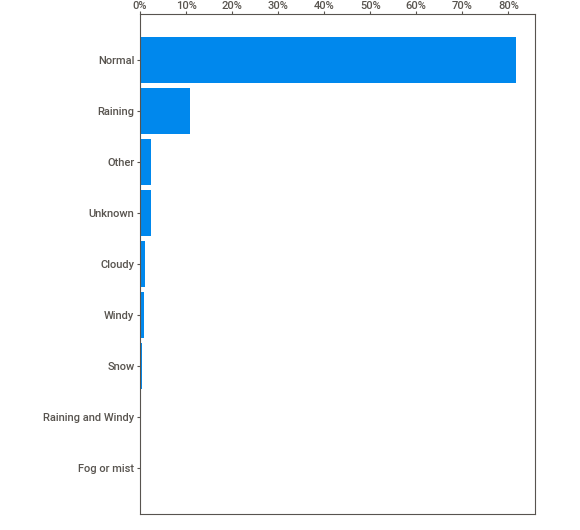
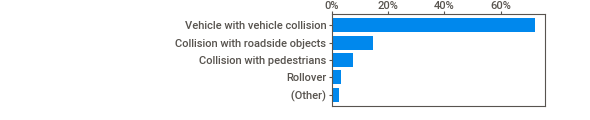
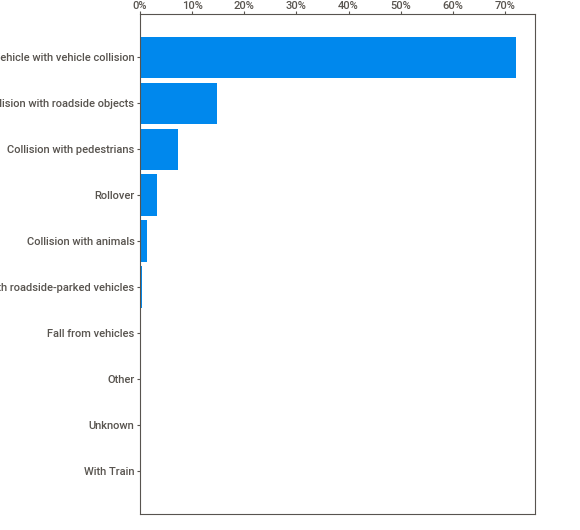
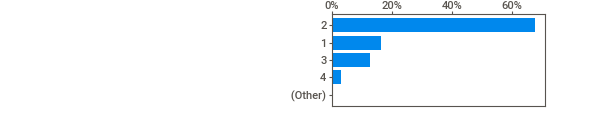
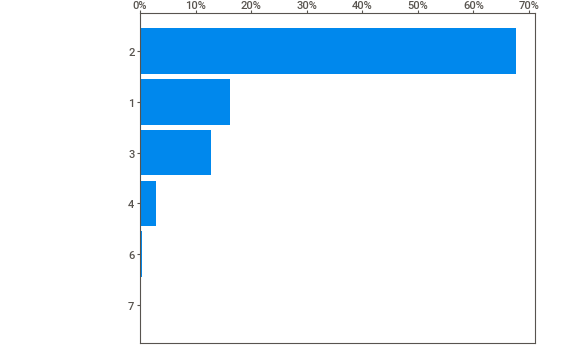
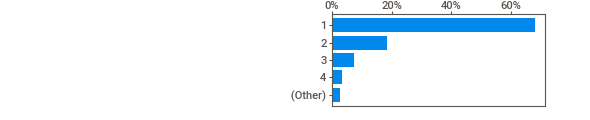
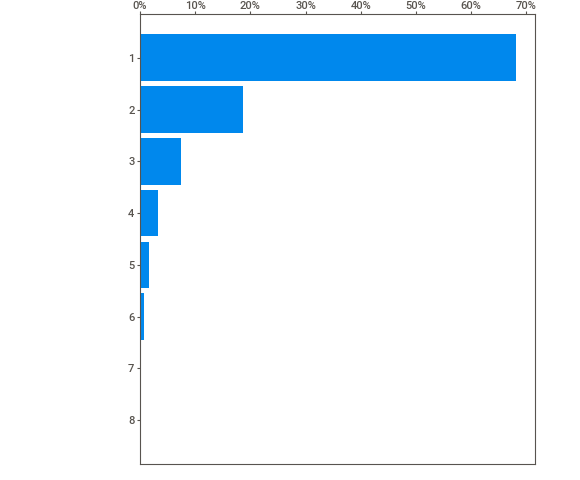
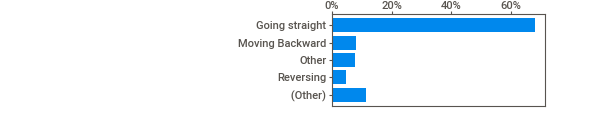
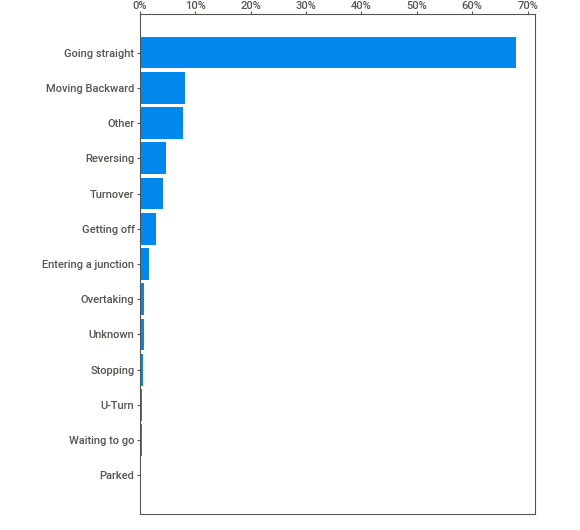
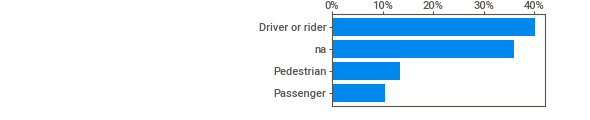
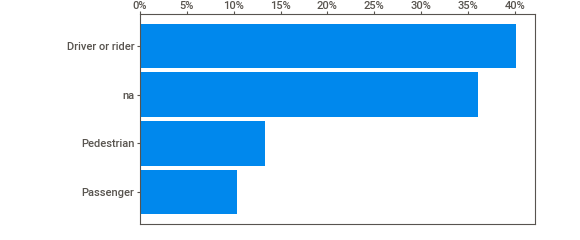
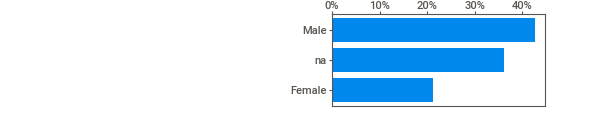
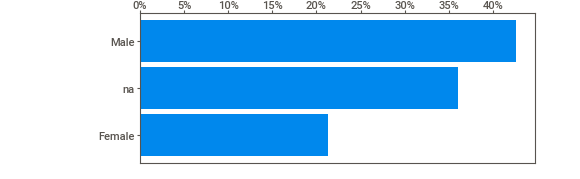
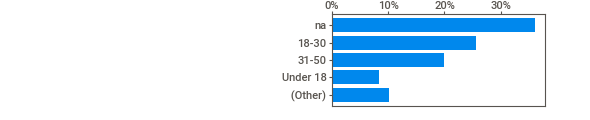
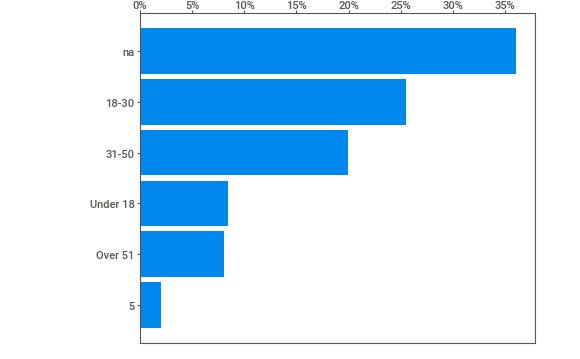
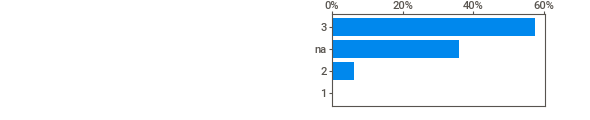
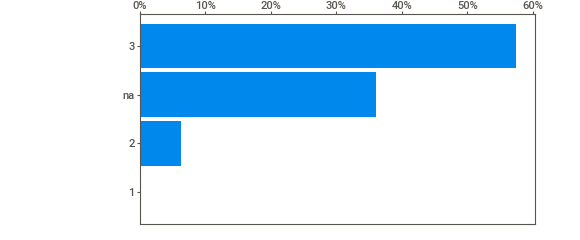
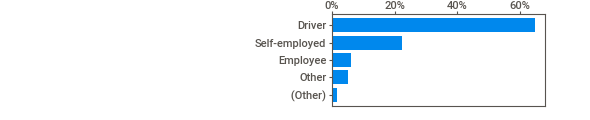
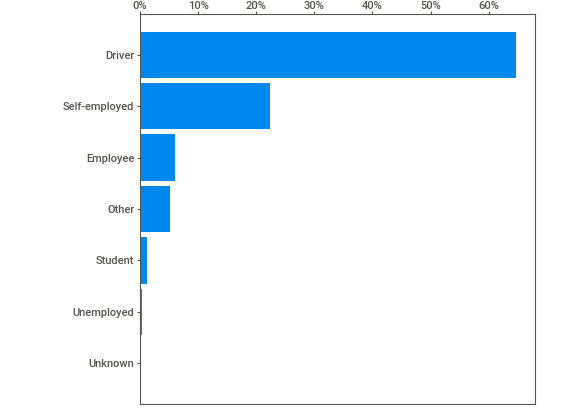
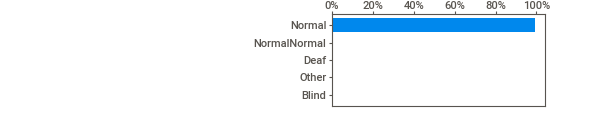
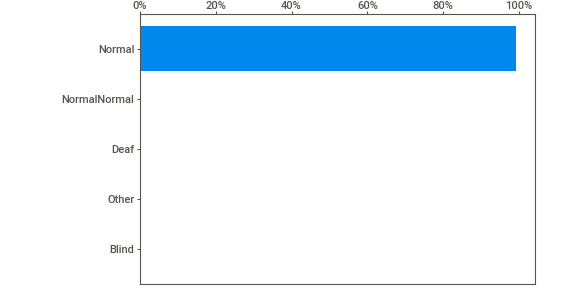
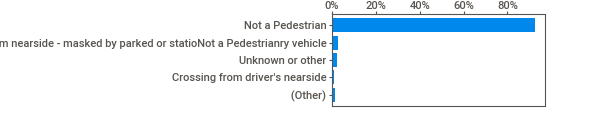
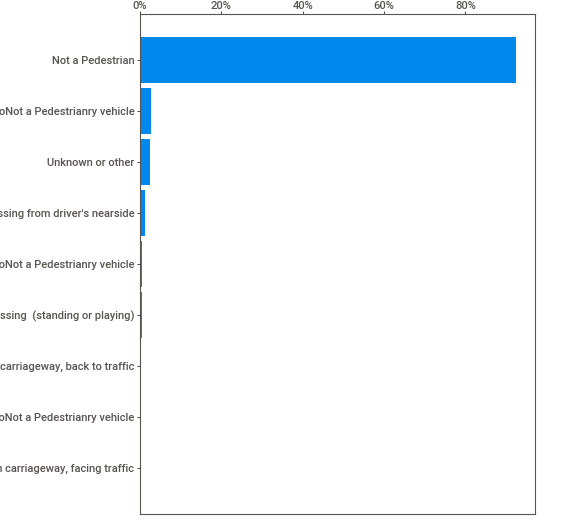
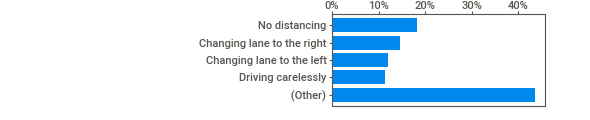
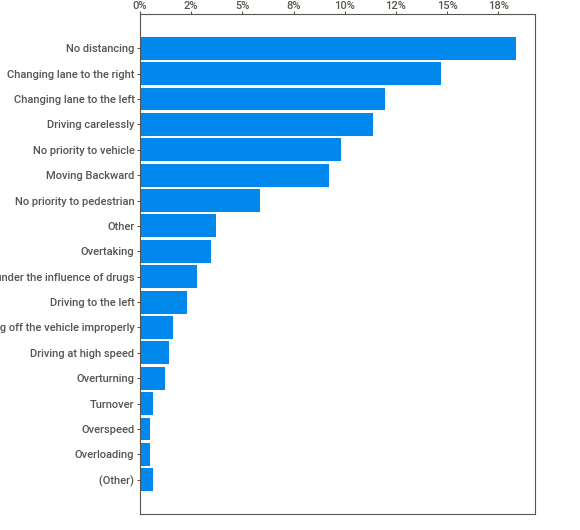
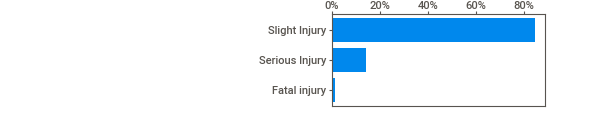
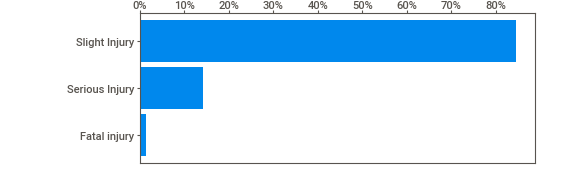
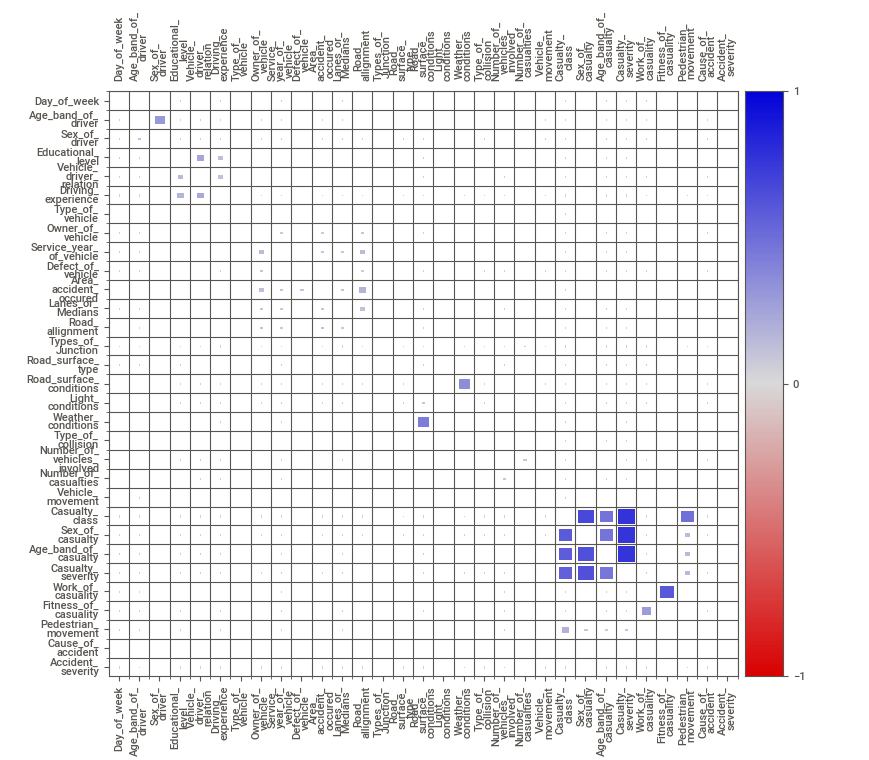
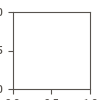

None


In [ ]:
# print(RT_report.show_notebook())

In [ ]:
RTA_data = data

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.



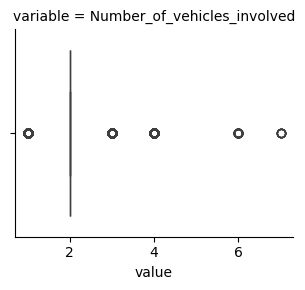

In [ ]:
drawBox = pd.melt(RTA_data, RTA_data.describe().columns[-1], RTA_data.describe().columns[:-1])

box_plot = sns.FacetGrid(drawBox, col="variable", col_wrap=3, sharex=False, sharey=False)
box_plot.map(sns.boxplot, "value")

plt.show()

In [ ]:
RTA_data.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [ ]:
RTA_data.shape

(12316, 32)

In [ ]:
# function returns the column names having more than 50% missing values
def missing_values(df):
    missing_df=pd.DataFrame(100*RTA_data.isnull().sum()/df.shape[0],columns=['% Missing'])
    return missing_df[missing_df['% Missing']>0]

In [ ]:
print(missing_values(RTA_data))

                         % Missing
Educational_level         6.016564
Vehicle_driver_relation   4.701202
Driving_experience        6.731082
Type_of_vehicle           7.713543
Owner_of_vehicle          3.913608
Service_year_of_vehicle  31.893472
Defect_of_vehicle        35.945112
Area_accident_occured     1.940565
Lanes_or_Medians          3.126015
Road_allignment           1.152972
Types_of_Junction         7.202014
Road_surface_type         1.396557
Type_of_collision         1.258525
Vehicle_movement          2.500812
Work_of_casuality        25.966223
Fitness_of_casuality     21.394933


In [ ]:
RTA_data.shape


(12316, 32)

In [ ]:
RTA_data = RTA_data.drop(columns = ['Number_of_vehicles_involved', 'Vehicle_driver_relation', 'Casualty_class', 'Casualty_severity'])
RTA_data.shape

(12316, 28)

In [ ]:
RTA_data.fillna('missing', inplace=True)

In [ ]:
RTA_data.isnull().sum()

Time                       0
Day_of_week                0
Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Driving_experience         0
Type_of_vehicle            0
Owner_of_vehicle           0
Service_year_of_vehicle    0
Defect_of_vehicle          0
Area_accident_occured      0
Lanes_or_Medians           0
Road_allignment            0
Types_of_Junction          0
Road_surface_type          0
Road_surface_conditions    0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Number_of_casualties       0
Vehicle_movement           0
Sex_of_casualty            0
Age_band_of_casualty       0
Work_of_casuality          0
Fitness_of_casuality       0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64

In [ ]:
RTA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Time                     12316 non-null  object
 1   Day_of_week              12316 non-null  object
 2   Age_band_of_driver       12316 non-null  object
 3   Sex_of_driver            12316 non-null  object
 4   Educational_level        12316 non-null  object
 5   Vehicle_driver_relation  12316 non-null  object
 6   Driving_experience       12316 non-null  object
 7   Type_of_vehicle          12316 non-null  object
 8   Owner_of_vehicle         12316 non-null  object
 9   Service_year_of_vehicle  12316 non-null  object
 10  Defect_of_vehicle        12316 non-null  object
 11  Area_accident_occured    12316 non-null  object
 12  Lanes_or_Medians         12316 non-null  object
 13  Road_allignment          12316 non-null  object
 14  Types_of_Junction        12316 non-nul

In [ ]:
def ordinal_encoder(df, feats):
    for feat in feats:
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

df = ordinal_encoder(RTA_data, RTA_data.drop(['Accident_severity'], axis=1).columns)
df.shape

(12316, 28)

<Axes: >

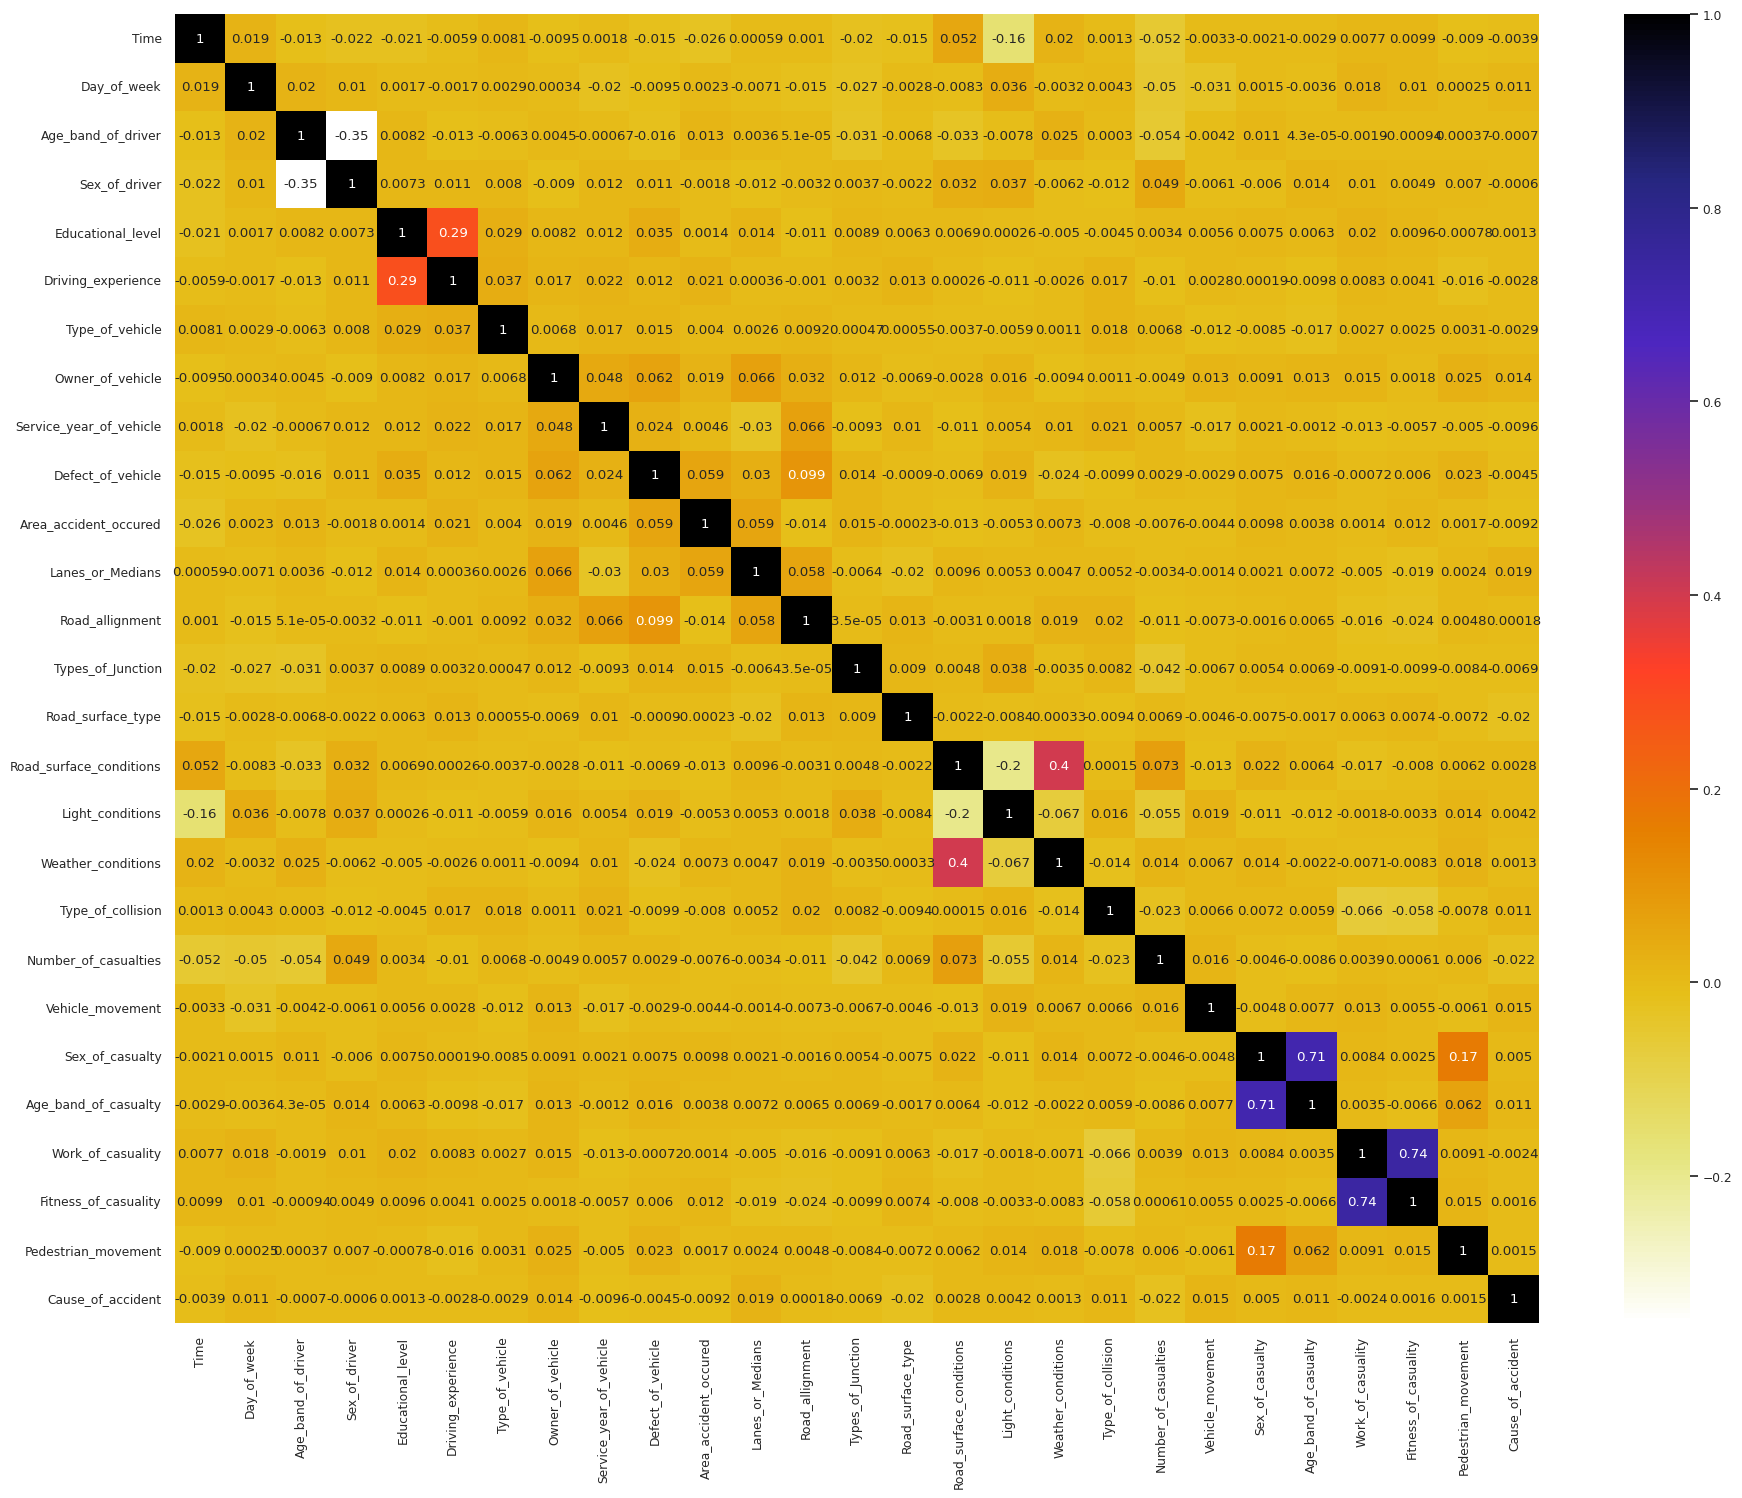

In [ ]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(8621, 27) (3695, 27) (8621,) (3695,)


In [ ]:
X_train

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Weather_conditions,Type_of_collision,Number_of_casualties,Vehicle_movement,Sex_of_casualty,Age_band_of_casualty,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident
4759,934,6,1,1,2,0,0,3,5,2,...,2,2,0,1,0,1,0,2,5,0
5676,886,6,1,1,1,4,14,3,3,3,...,2,8,0,2,1,0,3,2,5,16
353,880,3,4,0,4,0,7,3,5,2,...,2,2,0,2,1,0,7,2,5,3
6223,846,2,1,1,4,2,9,3,3,2,...,2,8,0,2,1,0,0,2,5,1
456,114,5,3,1,2,1,0,1,2,2,...,2,2,5,2,1,1,7,5,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,463,6,4,1,4,0,8,3,2,3,...,2,8,1,2,0,0,0,2,5,3
5191,435,6,1,1,1,1,0,3,1,2,...,2,8,0,2,1,1,7,5,5,0
5390,156,6,1,1,0,2,17,0,5,2,...,2,8,0,4,1,0,0,2,5,9
860,1019,4,2,1,2,2,17,3,1,3,...,3,8,1,2,1,1,0,2,5,10


In [ ]:
print('The class Imbalance in the data is given below')

print(df['Accident_severity'].value_counts(),'\n')
print('-'*50, '\n')


The class Imbalance in the data is given below
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64 

-------------------------------------------------- 



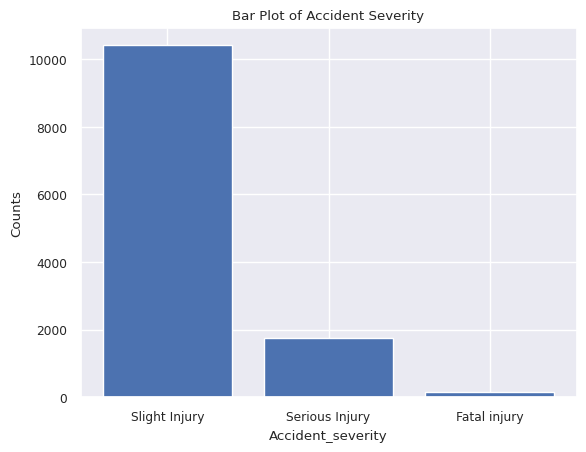

In [ ]:
# put the sum of unique value
accident_counts = pd.Series({'Slight Injury': 10415, 'Serious Injury': 1743, 'Fatal injury':158 })

plt.bar(accident_counts.index, accident_counts.values)

# Adding labels and title
plt.xlabel('Accident_severity')
plt.ylabel('Counts')
plt.title('Bar Plot of Accident Severity')

# Customizing x-axis ticks to show original categories
plt.xticks(accident_counts.index, accident_counts.index)

# Show plot
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE,SMOTENC,RandomOverSampler
from collections import Counter

In [ ]:
counter = Counter(y_train)

print("="*40)

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")
print("="*40)


Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)


In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("="*40)

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")
print("="*40)


Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)


In [ ]:
print(X_train.shape, y_train.shape)

(21972, 27) (21972,)


In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif,SelectKBest,chi2,f_classif





# <font color=0BB790><strong>Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,f1_score, confusion_matrix, RocCurveDisplay, roc_curve, roc_auc_score

In [ ]:
print(y_train.shape)
print(X_train.shape)

(21972,)
(21972, 27)


In [ ]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
        models.append(xgb)


    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
        models.append(rf)

    return scores,models

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [ ]:
y_test_encoded.shape

(3695,)

In [ ]:
scores,models = modelling(X_train,y_train_encoded, X_test, y_test_encoded, xgb=True, rf=True)
print(scores)

{'xgb': [0.8143437077131258], 'rf': [0.7964817320703653]}
